<a href="https://colab.research.google.com/github/pylabview/Project2_Heart_Failure_Prediction_Dataset/blob/main/Project_2_Heart_Failure_Predicctions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Science Heart_Failure_Prediction_Dataset
Rodrigo Arguello-Serrano

>This first project will be a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

<a name="TOC"></a> 
#🗂  Table of Contents
1. [🖌 Source Control and Data Cleaning](#1)
  - [📒 Data Dictionary ](#1.1)
  - [Module Imports & Mounting Goolgle Drive](#1.2)  
  - [🐍 Helper Functions](#1.1.1)
  - [Loading Data](#1.3)
  - [🧽 Data Cleaning](#1.4)
2. [📊 Exploratory Data](#3)
  - [🐍 Plot Functions](#3.1.1)
  - [EDA Numerical Columns (Histograms & Boxes)](#3.2)
  - [EDA Categorical Columns (Barplots)](#3.3)
  - [Heat Map (Correlated Features)](#3.5)

<a name="1"></a>
#Project 1 - Parts 1 & 2: Source Control and Data Cleaning

⬅️[Go back to TOC](#TOC)

Part 1: Seeting GitHub Repo

[Project GitHub Repo](https://github.com/pylabview/Project2_Heart_Failure_Prediction_Dataset)

<a name="1.1"></a>
#📒 Data Dictionary

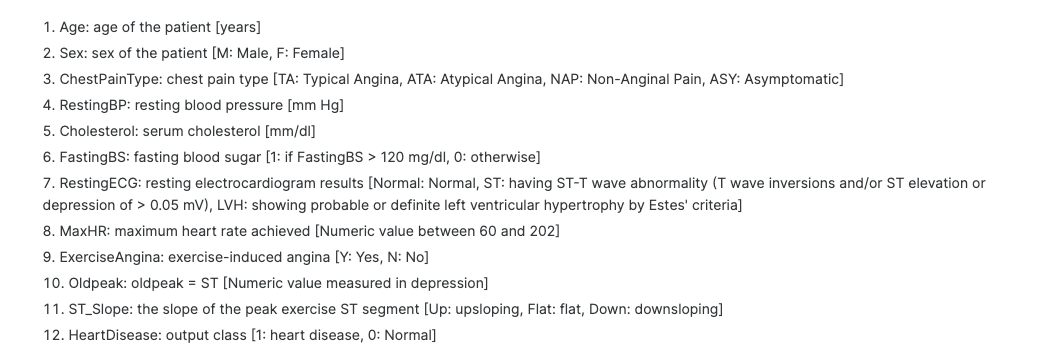

<a name="1.2"></a>
## Module Imports & Mounting Goolgle Drive

In [4]:
# imports
# Pandas
import pandas as pd
# Numpy
import numpy as np

# MatPlotLib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter

#Typing Checks
from IPython.core.magics.script import List

#To print dicts formatted
import pprint

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Regression Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Set global scikit-learn configuration 
from sklearn import set_config
# Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import (ColumnTransformer, make_column_selector,
                             make_column_transformer)
from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay, 
                             PrecisionRecallDisplay, RocCurveDisplay, 
                             f1_score, accuracy_score, classification_report,
                             precision_score)


#Mount Google drive
from google.colab import drive

#Setting plots styles
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])
#Moubt Gogle Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<a name="1.1.1"></a>
## 🐍 Helper Functions

In [5]:
#Finding duplicates function with pretty print
#Also removes dups in place!
def find_dups(df, drop_dups=True):
  dups_count = df.duplicated().sum()
  if dups_count == 0:
    print('There are no duplicates!!!')
  else:   
    print(f'There are {dups_count} duplicate rows.')
  
  if dups_count != 0 and drop_dups:
    df.drop_duplicates(inplace=True)
    print(f'There are ZERO duplicate rows (Verification).')    

In [6]:
#Find missing values accros all features
#with pretty print: Col name , percentage and data type
def get_missing_values(df):
  print(f"Total Rows: {df.shape[0]}, num of features: {df.shape[1]-1}, and one Target column")
  miss_series = df.isna().sum()
  types_series = df.dtypes
  col = miss_series.index
  for i,v in enumerate(miss_series):
    if not v==0:
      print(f'''{col[i]}:{v}, total %{(v/df.shape[0])*100:.3f} of missing values -->{types_series[i]}''')

In [7]:
#Getting numeric columns
# retrun a list 
def get_num_cols(df,type_list:List = ['float64','int64']):
  series_type = df.dtypes
  iseries = series_type.index
  n_col_list = []
  for i,v in enumerate(series_type):
    if series_type.values[i].name in type_list:
      n_col_list.append(iseries[i])
  return n_col_list

In [8]:
#Getting categorical columns
# retrun a list 
def get_cat_cols(df):
  # Column Types accepted 
  series_type = df.dtypes
  iseries = series_type.index
  n_obj_list = []
  for i,v in enumerate(series_type):
    if series_type.values[i].name == 'object':
      n_obj_list.append(iseries[i])
  return n_obj_list

In [9]:
# Python Dictionary Pretty Print 
def pretty_print_dict(seq):
  if isinstance(seq,dict):
    pprint.pprint(seq)
  else:
    print("Not a dictionary")

In [10]:
#Function to explore data inconsistencies
#Preety print of cat columns value counts!
def cat_columns_eda(df):
  # select only object columns
  categoricals = df.select_dtypes(include='object')

  # check value counts for each object column
  for col in categoricals.columns:
    print(f"Column name: ****{col}****")
    print(categoricals[col].value_counts(), '\n')

<a name="1.3"></a>
## Loading Data

In [20]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assignments/Data/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<a name="1.4"></a>
## 🧽 Data Cleaning

In [23]:
#Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [21]:
# 4) Identify missing values.
get_missing_values(df)

Total Rows: 918, num of features: 11, and one Target column


In [22]:
#Check for inconsistencies
cat_columns_eda(df)

Column name: ****Sex****
M    725
F    193
Name: Sex, dtype: int64 

Column name: ****ChestPainType****
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64 

Column name: ****RestingECG****
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64 

Column name: ****ExerciseAngina****
N    547
Y    371
Name: ExerciseAngina, dtype: int64 

Column name: ****ST_Slope****
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64 



> There are no inconsistencies

In [24]:
#Checking balance
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

> Data is almost balance! 55% --> Class 1 and 45% --> Class 0

In [25]:
# Are there duplicates? If so, drop any duplicates.
find_dups(df)

There are no duplicates!!!


In [26]:
#8) For any numerical columns, obtain the summary statistics of each (min, max, mean).
#CHeck for abnormalities
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [27]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

> All features are aligned with data dictionary

> Everything looks good!

<a name="3"></a>
# 📊 Exploratory Data

<a name="3.1.1"></a>
## 🐍 Plot Functions

⬅️[Go back to TOC](#TOC)

In [28]:
def plot_numeric(df,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(data=df,x = col,ax = axes[0])
  mean_value = df[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--', 
           label=f"Mean Value = ${mean_value:,.2f}",);

  med_value = df[col].median()
  axes[0].axvline(med_value,color='black', ls='--', 
           label=f"Median Value = ${med_value:,.2f}");


  sns.boxplot(data=df, x = col, ax = axes[1])

  ## Updating title of top graph 
  axes[0].set_title(f'EDA for {col}')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

In [29]:
def plot_numeric_box(df,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=1, figsize=(10,5))

  # sns.histplot(data=df,x = col,ax = axes[0])
  mean_value = df[col].mean()

  med_value = df[col].median()


  axes.axvline(mean_value,color='slategray', ls='--', lw=3,
            label=f"Mean {col} = {mean_value:,.2f}");

  axes.axvline(med_value,color='skyblue', ls=':', lw=3,
            label=f"Median {col} = {med_value:,.2f}");
  ## Use seaborn 
  sns.boxplot(data=df, x = col)

  axes.spines['right'].set_visible(False)
  axes.spines['top'].set_visible(False)
  ## Updating title of top graph 
  axes.set_title(f'EDA for {col}',y=1.1)
  axes.legend()
  ## Fixing any overlapping labels and showing
  return fig,axes

In [30]:
## Creating a BETTER version of our function with fancy price ticks
from matplotlib.ticker import FuncFormatter
def hundred_k(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in thousands"""
    return f"${x*1e-3:,.0f}K"


def plot_dist(data,x,y,figsize=(10,5),format_price=True,
              despine=True):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Plot histogram
    sns.histplot(data=data,x=x,ax=ax)
    ax.set_title(f'Distribution of {y}',
                 fontsize='x-large',y=1.1);


    ## Annotating mean and median
    mean_price = data[x].mean()
    ax.axvline(mean_price,color='slategray', ls='--', lw=3,
            label=f"Mean {x} = {mean_price:,.2f}");

    med_price = data[x].median()
    ax.axvline(med_price,color='skyblue', ls=':', lw=3,
            label=f"Median {x} = {med_price:,.2f}");


    ## Increasing Axis Label Font Sizes
    ax.set_xlabel(ax.xaxis.get_label().get_text(),
                fontsize='large')
    ax.set_ylabel(ax.yaxis.get_label().get_text(),
                fontsize='large')

    

    ## if format_price is True use our FuncFormatter
    if format_price:
        
        price_fmt_100k = FuncFormatter(hundred_k)
        ax.xaxis.set_major_formatter(price_fmt_100k)

    if despine:
        ## removing top and right border
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

    ## add a legend        
    ax.legend()

    return fig,ax

- Approaches
We will go Column-by-Column with the EDA using a function (plus markdown interpretations for each)

In [31]:
# Checking num columna
print(f"Numerical column: {get_num_cols(df)[:-1]}")
print("Drug column is the target")



Numerical column: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
Drug column is the target


- For each numeric feature, we will plot the distribution and a boxplot.

<a name="3.2"></a>
## EDA Numerical Columns (Histograms & Boxes)

⬅️[Go back to TOC](#TOC)

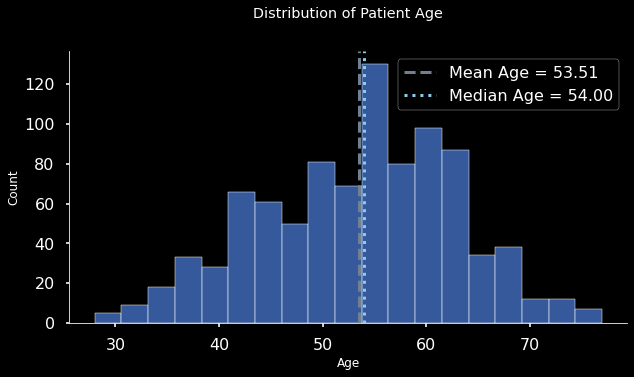

In [32]:
plot_dist(df,'Age','Patient Age',format_price=False);

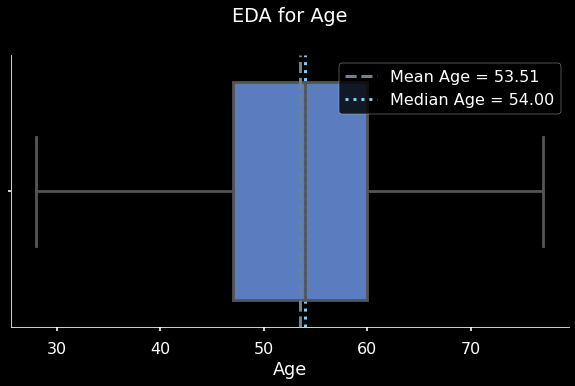

In [33]:
plot_numeric_box(df,'Age');

> There are no outliers for Age

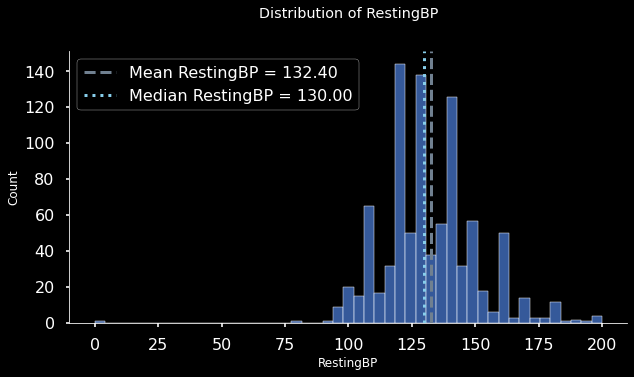

In [34]:
plot_dist(df,'RestingBP','RestingBP',format_price=False);

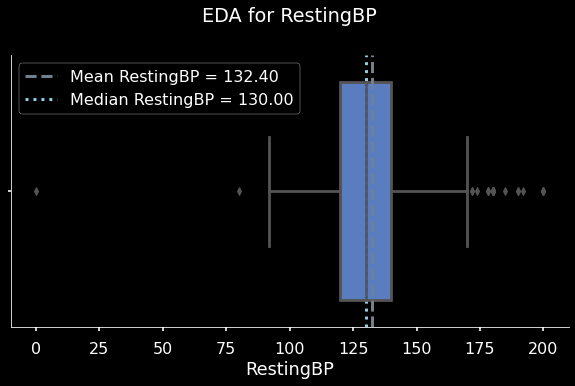

In [35]:
plot_numeric_box(df,'RestingBP');

> The RestingECG has few outliers < 80 and 175 <

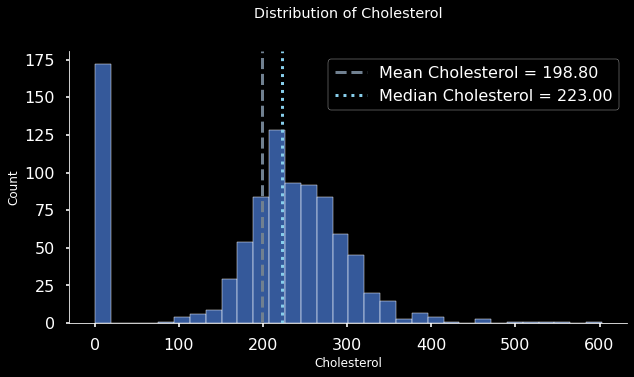

In [53]:
plot_dist(df,'Cholesterol','Cholesterol',format_price=False);

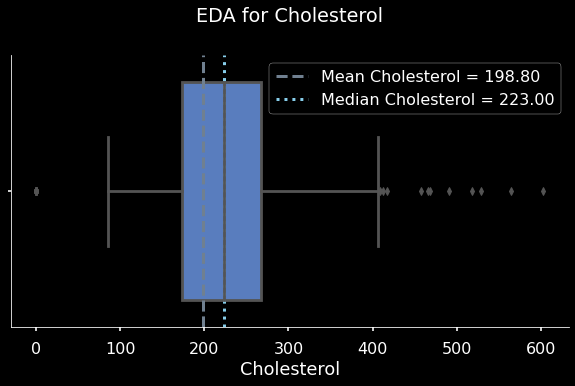

In [55]:
plot_numeric_box(df,'Cholesterol');

In [67]:
f"Cholesterol has {df[df['Cholesterol']==0].shape[0]/df.shape[0]*100:.2f}% of ZERO values"

'Cholesterol has 18.74% of ZERO values'

> I will considere the ZERO values are NnN, then will input

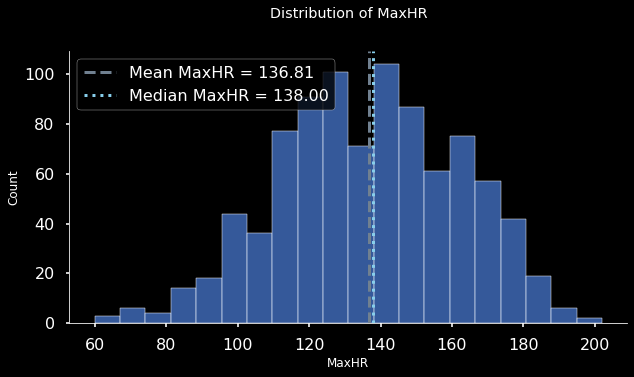

In [43]:
plot_dist(df,'MaxHR','MaxHR',format_price=False);

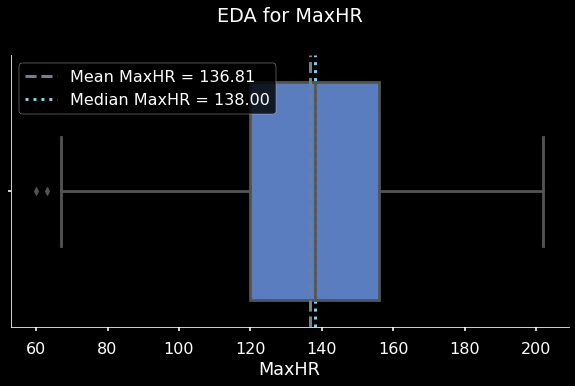

In [42]:
plot_numeric_box(df,'MaxHR');

>Max heart rate has two outliers belos 65

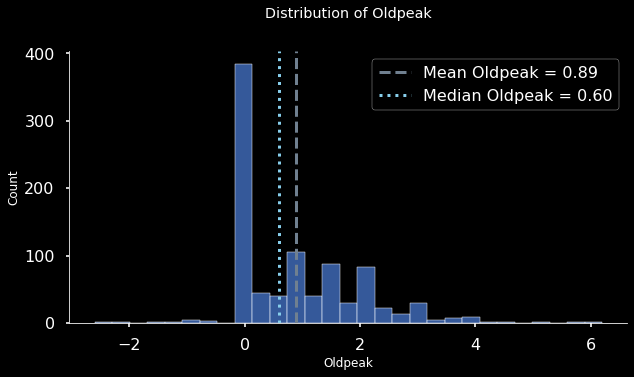

In [39]:
plot_dist(df,'Oldpeak','Oldpeak',format_price=False);

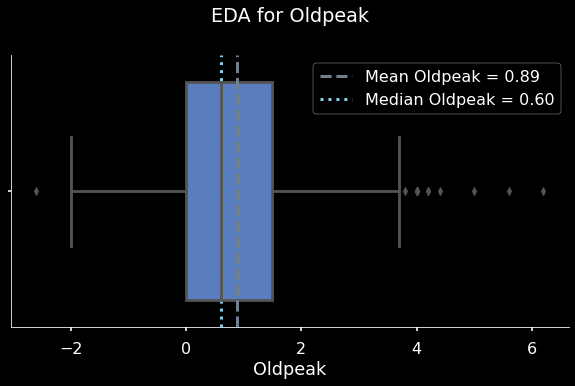

In [41]:
plot_numeric_box(df,'Oldpeak');

> Few outliers below ZERO and Above 4

<a name="3.3"></a>
## EDA Categorical Columns (Barplots)
- We will view the categorical counts of all of the object type columns and visualize this information with a barplot. 

⬅️[Go back to TOC](#TOC)

In [48]:
## functionize a barplot and call it plot_bar

def plot_bar(data,x, y, figsize=(20,5)):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Plot barplot
    
    ## counts, counts up the categories, sort the values, then puts them in a 
    ## data frame.
    
    counts = df[x].value_counts().sort_values(ascending=False).to_frame()
    ## ploting the barplot

    sns.barplot(data=counts,x=counts.index, y = counts[x],ax=ax)

    plt.xticks(rotation= 90)
    ax.set_title(f'Categorical Frequencies of {y}', fontsize = 20, fontweight = 'bold');
    ax.set_xlabel(f'Categories for {y}', fontsize = 15, fontweight = 'bold')
    ax.set_ylabel('Counts', fontsize = 15, fontweight = 'bold')

    return fig,ax

In [46]:
print(f"The dataset cat columns are:{get_cat_cols(df)}")

The dataset cat columns are:['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


M    725
F    193
Name: Sex, dtype: int64


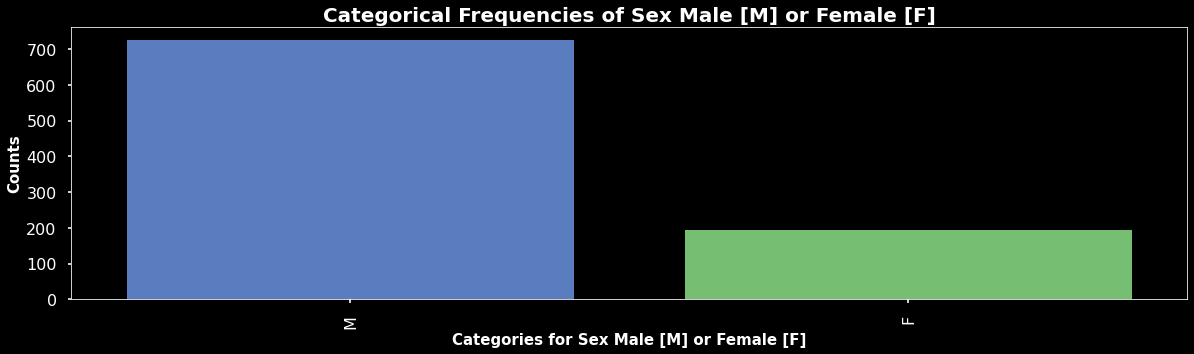

In [49]:
fig, ax = plot_bar(df, 'Sex', 'Sex Male [M] or Female [F]');
print(df['Sex'].value_counts())

> Number of Males is significantly higher than Females

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64


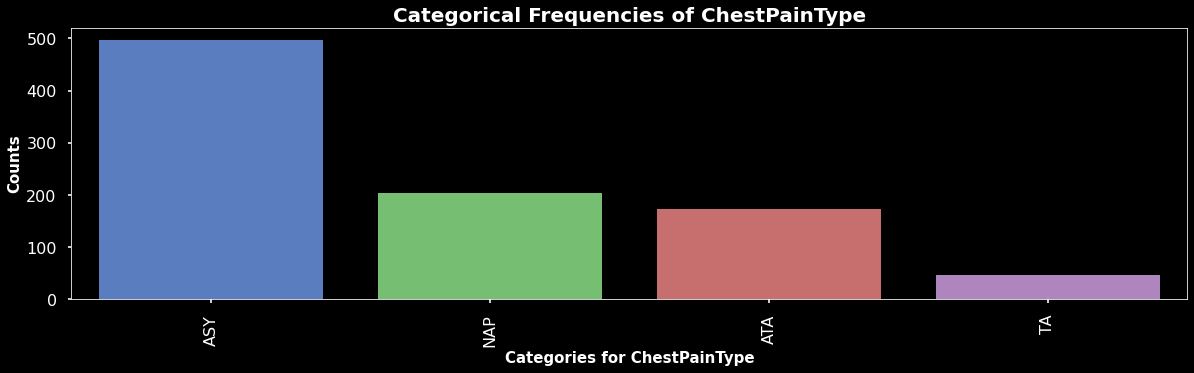

In [50]:
fig, ax = plot_bar(df, 'ChestPainType', 'ChestPainType');
print(df['ChestPainType'].value_counts())

> The patients with Asymptomatic chest pain are the majority, and the Typical Angina has ther lowest samples

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64


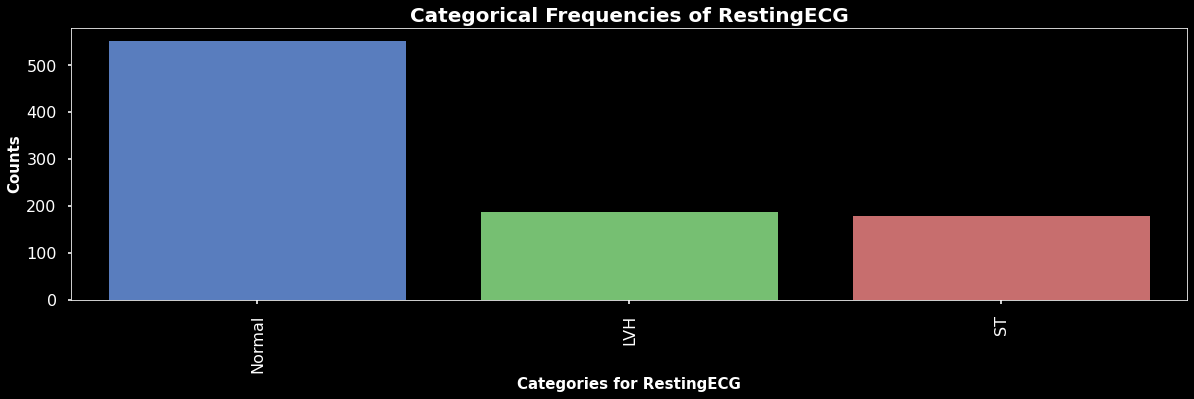

In [51]:
fig, ax = plot_bar(df, 'RestingECG', 'RestingECG');
print(df['RestingECG'].value_counts())

> The Resting ECG NORMAL is the majority of samples, the ST and LVH are pretty much the same quantities

<a name="3.5"></a>
## Heat Map (Correlated Features)

⬅️[Go back to TOC](#TOC)

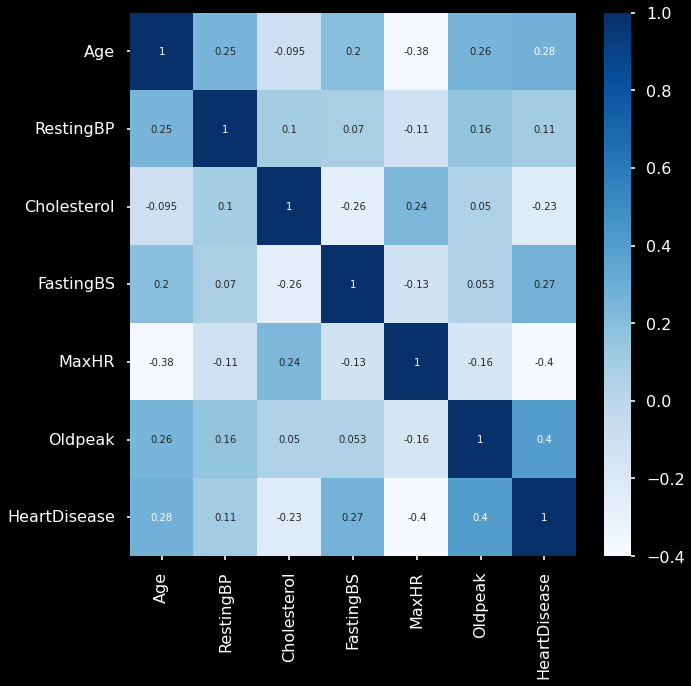

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues');

There no strong or moderate correlatiom between features and target